## Using SDSS data to determine some characteristics of the Coma Cluster

In [1]:
import pandas as pd

from astropy.visualization import hist
from scipy.optimize import curve_fit

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import math

In [2]:
table = pd.read_csv("COMA.csv",delimiter=',', nrows=764, skiprows=[0]) #format to look nice
table.head(10)

,objID,ra,dec,modelMag_r,modelMagErr_r,extinction_r,class,redshift,zerr,velDisp,velDisperr
0,1237667322724024468,194.976396,26.819967,15.87394,0.003323,0.021009,GALAXY,0.026741,0.000017,24.52307,13.338430
1,1237667442974982311,195.019097,27.032470,16.73576,0.006262,0.022530,GALAXY,0.023210,0.000031,45.74616,14.019450
2,1237667322724024401,195.014696,26.898107,13.49986,0.001930,0.022515,GALAXY,0.019764,0.000008,125.55930,2.994381
3,1237667323798159456,196.046867,27.490444,14.87960,0.002653,0.024423,GALAXY,0.017770,0.000012,72.12569,5.633148
4,1237667323798159557,196.068599,27.506385,16.19275,0.006796,0.024259,GALAXY,0.023533,0.000036,19.52088,20.236960
5,1237667442974982263,194.936973,26.954800,16.96306,0.005397,0.023233,GALAXY,0.034246,0.000007,39.46657,12.034240
6,1237667442974982309,195.004940,26.956103,17.08089,0.006030,0.022926,GALAXY,0.023916,0.000029,0.00000,49.649710
7,1237665427553386633,196.054698,28.542454,17.39596,0.010035,0.017270,GALAXY,0.027068,0.000006,0.00000,79.900180
8,1237665427553386636,196.065711,28.545387,17.61356,0.008699,0.017077,GALAXY,0.027857,0.000012,40.77054,29.884360
9,1237665440442548314,196.076757,28.468135,14.86739,0.002785,0.016452,GALAXY,0.025773,0.000014,65.37651,5.214272


In [3]:
ra = table['ra'].values
dec = table['dec'].values

from sympy.stats import *
import numpy as np

RA = np.mean(ra)
DEC = np.mean(dec)
display(RA,DEC)

194.87151784398736

27.93184897852197

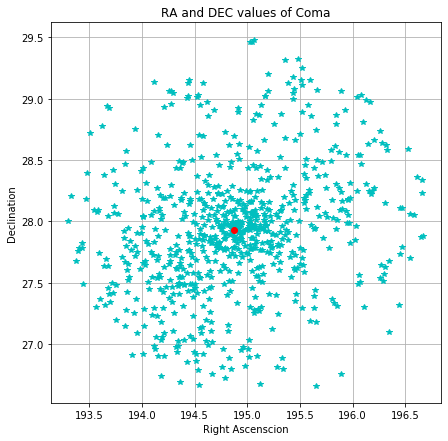

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.title('RA and DEC values of Coma')
plt.grid(True)
plt.xlabel('Right Ascenscion')
plt.ylabel('Declination')
plt.plot(ra[0:],dec[0:],'c*')
plt.plot(RA,DEC,'ro')

In [5]:
rmag1=table['modelMag_r'].values

## want weight to come from the bright galaxies
## m = M + 2.5*np.log(f)

M = 4.76
m = np.asarray(rmag1)
f =10**((M-m)/2.5)

A = (f*ra).sum()/f.sum()
B = (f*dec).sum()/f.sum()
print(A, B)

for i in range(0,761): #range(0,761)
    a = ((f[i]*ra[i]).sum()/f.sum())
    b = ((f[i]*dec[i]).sum()/f.sum())

194.88691385268973 27.958158901876946


Eigenvalues= [357.82283513 186.14022507]
Eigenvectors= [[ 0.93369549 -0.35806804]
 [ 0.35806804  0.93369549]]


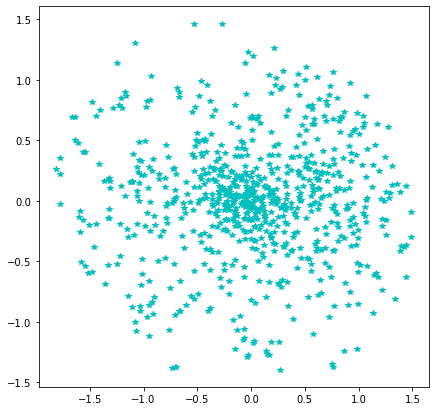

In [6]:
## find the shifted weight

table["shifted ra"] = (ra - RA)
table["shifted dec"] = (dec - DEC)
X = table[["shifted ra", "shifted dec"]].values

from numpy.linalg import eig 
from numpy import matmul


e, P = eig(matmul(X.T, X)) #multiply X by its inverse X*XT

print('Eigenvalues=',e)
print('Eigenvectors=',P)
UV = matmul(X, -P)

plt.figure(figsize=(7,7))
plt.plot(UV[:,0], UV[:,1], "c*")

## Constructing a histogram of the redshift values

In [7]:
z = table['redshift'].values

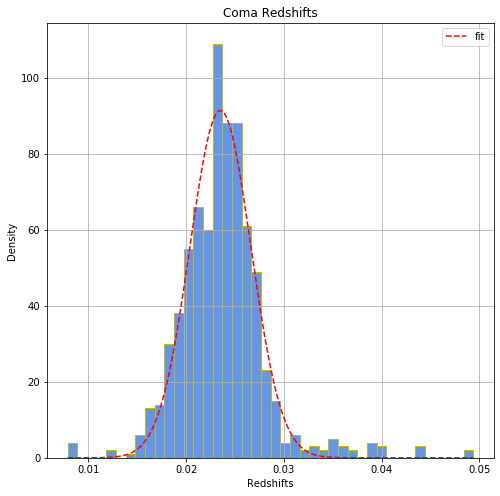

mean= 0.0235 simga= 0.0044


In [8]:
plt.figure(figsize=(8,8))
width = 0.001

n = math.ceil((table['redshift'].max() - table['redshift'].min())/width)
ax = plt.hist(table['redshift'], bins = n, histtype='bar', ec='y', color='cornflowerblue')

plt.title('Coma Redshifts')
plt.ylabel('Density')
plt.xlabel('Redshifts')
plt.grid(1)

import statistics as stat
z = np.asarray(z)

mu = stat.median(z)
sigma = stat.stdev(z)


a = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma))

def Gauss(z, a, mu, sigma):
    return a*(np.exp(-((z - mu)**2 / (2 * sigma))))

bin_heights, bin_borders, _ = ax
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss(x_interval_for_fit, *popt),'r--',label='fit')
plt.legend()
plt.show()


print('mean=','%.4f' % mu,'simga=','%.4f' % sigma)

### Recessional velocity and distance
Using the redshift of Coma, we can calculate the recessional velocity of the cluster (using the Doppler shift
formula). Then we can use Hubble’s Law to convert the recessional velocity to the distance to the cluster.

$$v_{r}=H_{0}D\ $$
$$ z = v_{r}/c $$

In [9]:
vr = mu*299792
print('vr =',vr,'km/s')
R = vr/ 67.8 
print('Distance=',R,'Mpc')
#km.s−1.Mpc−1

R2 = np.asarray(z*299892)/(67.8) # array of values of distance to each member based on z

vr = 7049.50994864 km/s
Distance= 103.97507298879057 Mpc


In [10]:
# RA --> (Galaxy ra - center coordinates ra) == delta RA 
# DEC --> (GALAXY dec - center coordinates dec)

# separation in RA = delta RA*(cos avg.Dec) (in degrees) --> need arcsec
# separation in DEC = > dec (no correction) --> need arcseconds
# avg dec = Galaxy dec + center dec /2 

### Total distance == sqrt ((separation in RA)^2 + (separation in DEC)^2) = separation 

In [11]:
# Converting Ra & dec from degress into radians & arcseconds
a_1 = A*(np.pi/180)
b_1 = B*(np.pi/180)
print('coordinates of cluster center in radians (ra,dec):',a_1, b_1) #coordinates of cluster center in radians


coordinates of cluster center in radians (ra,dec): 3.401418315779983 0.487961925633515


In [12]:
ra2 = np.asarray(ra)
dec2 = np.asarray(dec)

dec_av = (((dec2**2)+(B**2))/2)*(np.pi/180)

𝛼𝑔 = (ra2*(np.cos(dec_av))) ## RA == alpha
𝛿𝑔 = dec2 ## DEC == delta

In [13]:
print(A,B) #(ra, dec)
dec_av = (((dec2**2)+(B**2))/2)
𝛼𝑔 = (ra2*(np.cos(dec_av))) ## RA == alpha

𝜃 = np.arccos(np.sin(B)*np.sin(dec2)+np.cos(B)*np.cos(dec2)*np.cos(A-𝛼𝑔))
thet = 𝜃*(np.pi/180)*(206265)
par2 = R2*(10**6)
par = 103970000

p = np.round((par*thet)*4.848e-12,1)
print(len(p),len(thet))

194.88691385268973 27.958158901876946
761 761


In [14]:
# index of all values in p that are <=1.5
def condition(x): return x <= 1.5
member = [idx for idx, element in enumerate(p) if condition(element)]

print(len(member), 'values are <=1.5')
print('These values are', p[member])
print('the corresponding indeces are', member)

169 values are <=1.5
These values are [1.2 1.3 0.3 0.2 1.  1.  1.5 1.4 1.3 1.5 0.6 0.7 0.5 1.4 1.  0.4 1.2 1.5
 1.2 1.  1.3 1.2 0.3 1.5 1.3 0.7 0.8 0.4 1.4 1.3 1.5 1.5 1.3 1.2 1.1 1.2
 1.5 0.6 0.4 0.6 1.  0.6 1.4 0.6 0.6 1.1 1.2 0.7 0.8 1.5 1.5 1.1 1.5 0.8
 0.8 1.3 1.1 1.1 1.1 1.3 1.4 1.2 0.5 1.4 1.2 0.6 1.5 0.6 0.4 1.5 1.5 0.6
 0.9 0.7 0.6 1.3 1.3 0.9 1.3 1.1 1.5 1.3 1.3 1.4 1.  1.3 1.2 0.8 1.4 0.3
 1.2 0.7 0.4 1.3 1.5 0.6 0.8 1.1 0.7 0.7 1.5 0.8 0.8 0.8 1.3 1.3 0.5 0.9
 1.5 0.1 0.4 1.  1.1 1.  1.3 1.2 0.5 0.4 0.6 0.4 0.6 0.3 1.3 0.9 1.  0.9
 1.3 1.5 1.5 1.4 1.  0.9 1.4 0.9 1.3 1.3 1.5 1.1 1.5 0.6 0.9 1.  0.9 0.6
 1.2 0.2 0.2 0.2 1.3 0.3 1.3 0.4 1.2 0.3 1.  1.5 0.4 0.4 0.5 0.3 0.1 0.3
 1.4 0.7 1.1 0.8 0.8 0.6 0.5]
the corresponding indeces are [3, 8, 27, 32, 33, 35, 37, 67, 68, 73, 75, 83, 86, 89, 91, 105, 107, 113, 123, 124, 132, 133, 138, 142, 143, 148, 154, 162, 165, 168, 174, 202, 218, 222, 234, 239, 240, 247, 250, 251, 253, 255, 257, 258, 259, 263, 266, 270, 271, 282, 287, 296, 2

In [15]:
σ = np.asarray([])
σ = 5*sigma
print('sigma z=',σ)

for item in z[member]:
     if ((item<σ) and (item>-σ)) : print(item)

sigma z= 0.02200285288321596
0.01777024
0.02002974
0.02108984
0.02068225
0.02093789
0.01661109
0.02128608
0.02129176
0.02039584
0.02155076
0.02044867
0.0191456
0.02051797
0.02144919
0.01886249
0.02015118
0.01965179
0.01820282
0.01806066
0.0210654
0.01953211
0.02190111
0.01798755
0.01718794
0.02098727
0.01816591
0.01921797
0.02185673
0.02018797
0.01738534
0.01899429
0.02083039
0.01699532
0.02170492
0.01912005
0.02047269
0.01662251
0.01935221
0.01983889
0.01655244
0.01964111
0.02022178
0.02005155
0.02090726
0.01608296
0.02080937
0.02150175
0.02124036
0.02111432
0.017733000000000002
0.01935512


In [16]:
def condition1(x1): return ((x1<σ) and (x1>-σ))
OP = [idx1 for idx1, element in enumerate(z[member]) if condition1(element)]

print(len(OP), 'values are +/- 5σ = ',σ)
print('These values are', z[OP])
print('the corresponding indeces are', OP)

51 values are +/- 5σ =  0.02200285288321596
These values are [0.02674099 0.02353255 0.0260466  0.02404518 0.02031774 0.02531029
 0.02366776 0.0282389  0.02615086 0.02250939 0.02626066 0.02092743
 0.02694282 0.02453957 0.0274078  0.02323505 0.02291706 0.02210143
 0.0238004  0.02373173 0.02499963 0.02536839 0.02385668 0.02485387
 0.02587094 0.02698101 0.02682374 0.02713366 0.01828631 0.02364652
 0.02627785 0.02227376 0.02867174 0.01875564 0.02076338 0.02351745
 0.01693627 0.02343068 0.02531836 0.02447844 0.02543061 0.02570705
 0.01761597 0.02653266 0.02767608 0.02362565 0.02470391 0.02341828
 0.02616505 0.0256863  0.02730983]
the corresponding indeces are [0, 4, 12, 16, 17, 21, 25, 27, 31, 35, 36, 39, 44, 45, 52, 53, 54, 56, 57, 60, 61, 62, 64, 66, 70, 75, 79, 81, 82, 84, 90, 91, 97, 102, 112, 114, 117, 120, 122, 125, 134, 135, 136, 137, 142, 145, 149, 150, 152, 153, 159]


In [17]:
def condition(x): return x == 1.5
output2 = [idx for idx, element in enumerate(p) if condition(element)]
print(output2)
ra2 = np.asarray(table['ra'])
dec2 =np.asarray(table['dec'])
print('values at 1.5Mpc have ra, dec =',ra2[output2].max(),dec2[output2].max())

ra3 = np.asarray(table['ra']) #output == indices
dec3 = np.asarray(table['dec'])

[37, 73, 113, 142, 174, 202, 240, 282, 287, 298, 339, 357, 359, 416, 505, 527, 566, 640, 643, 659, 668, 706]
values at 1.5Mpc have ra, dec = 196.651635629513 28.745231600967802


In [18]:
###### find radius ######
#rad = sqrt((dec of center-dec to max dec at 1.5MPC)^2 + (ra of center-ra to max ra at 1.5MPC)^2)
mdec = B - dec2[member].max()
mra = A - 𝛼𝑔[member].max()
print(mdec,mra)

rad = np.sqrt((mra**2) + (mdec**2))
print(rad.mean())

-0.7870726990908565 -0.8184359306929423
1.1354826314406525


## Plotting member galaxies

Text(0.5, 1.0, 'Member Galaxies')

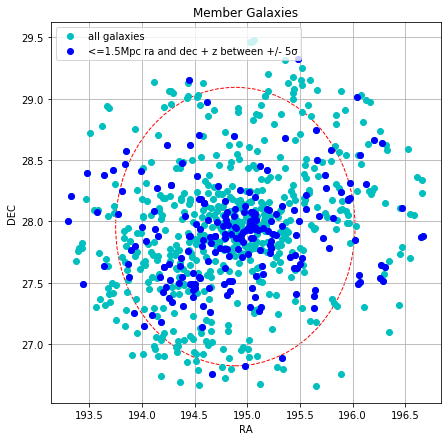

In [20]:
## member galaxies 

plt.figure(figsize=(7,7))

plt.plot(ra,dec,'co')
plt.plot(ra[OP],dec[OP],'bo')
plt.plot(ra[member],dec[member],'bo')

circle1 = plt.Circle((A,B),rad, color='r',fill=False,linestyle='--')
#circle1 = plt.Circle((ra6[output2].mean(), dec6[output2].mean()),1.5, color='r',fill=False,linestyle='--')
plt.gcf().gca().add_artist(circle1)

plt.legend(['all galaxies','<=1.5Mpc ra and dec + z between +/- 5σ'],loc=2)


#plot circle
plt.xlabel('RA')
plt.ylabel('DEC')
plt.grid(1)
plt.title('Member Galaxies')

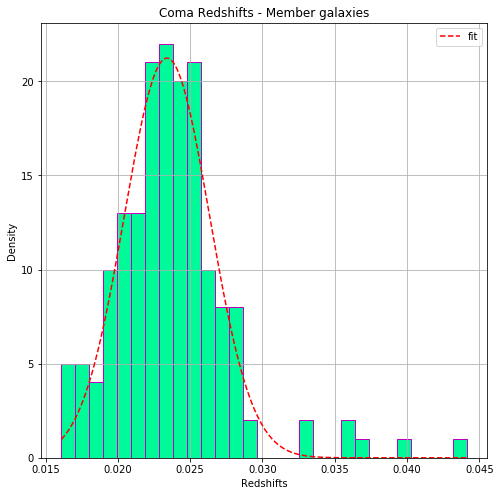

mean= 0.0237 simga= 0.0041


In [21]:
plt.figure(figsize=(8,8))
width = 0.001

n = math.ceil((z[member].max() - z[member].min())/width)
ax1 = plt.hist(z[member], bins = n, histtype='bar', ec='m', color='mediumspringgreen')

plt.title('Coma Redshifts - Member galaxies')
plt.ylabel('Density')
plt.xlabel('Redshifts')
plt.grid(1)


z_s = np.asarray(z[member])

mu1 = stat.mean(z_s)
sigma1 = stat.stdev(z_s)

a1 = 1 / (np.sqrt(2 * np.pi) * np.sqrt(sigma1))

def Gauss1(z_s, a1, mu1, sigma1):
    return a1*(np.exp(-((z_s - mu1)**2 / (2 * sigma1))))

bin_heights, bin_borders, _ = ax1
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss1, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss1(x_interval_for_fit, *popt),'r--',label='fit')

plt.legend()
plt.show()

print('mean=','%.4f' % mu1,'simga=','%.4f' % sigma1)

In [23]:
## m - M = 5(log d - 1) + A
## d == distance to galaxies as measured above
## A == magnitudes of extinction

A = np.asarray(table['extinction_r'])
m = np.asarray(table['modelMag_r'])
δerr = np.asarray(table['modelMagErr_r'])

## R-MAG ABSOLUTE

RMAG = np.asarray([])
modulus = 5*(np.log10(R2[member]-1))+A[member]-m[member]
RMAG = -5*(np.log10(R2[member]*1e6)-1)-A[member]+m[member]

derr = 0.4343/(R2[member]*1e6)

δRMAG = 0.4343*np.sqrt((δerr[member]**2)+(derr**2))

In [24]:
𝑀bol2 = 4.76
𝑀bol1 = RMAG
L_ratio = 10**((𝑀bol1-𝑀bol2)/-2.5)
luminosity = L_ratio

Reff,CDF=0.5 1.03 0.500298349814916
Reff= 0.667064466419888 Mpc
half radius 0.8894192885598508 Mpc
0.8894192885598508 0.4167976909112645


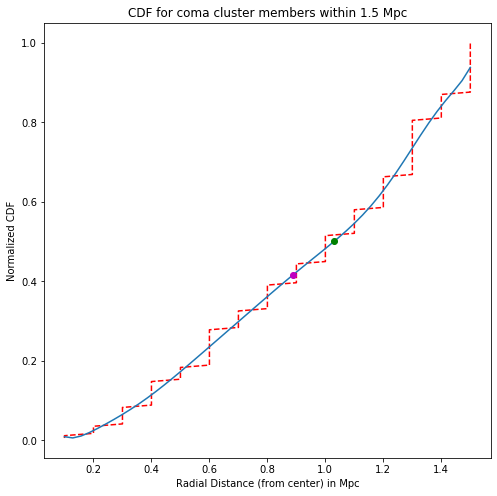

In [25]:
plt.figure(figsize=(8,8))

luminosity = np.asarray(L_ratio)
rd = np.linspace(0,1.5e6,169) #<-- x axis

radial_distances_sorted = np.sort(p[member]) #radial distances

x = np.sort(luminosity/luminosity.sum())
y = np.arange(1, len(x)+1)/len(x)   

plt.plot(radial_distances_sorted,y,'r--')

plt.xlabel('Radial Distance (from center) in Mpc')
plt.ylabel('Normalized CDF')
plt.title('CDF for coma cluster members within 1.5 Mpc')

j = np.polyfit(radial_distances_sorted, y, 10)
q = np.poly1d(j)

x_new = np.linspace(radial_distances_sorted[0], radial_distances_sorted[-1], 50)
y_new = q(x_new)

plt.plot(x_new,y_new)
print('Reff,CDF=0.5',1.03,q(1.03))


Reff = 4*q(1.03)/3
print('Reff=',Reff,'Mpc')
r_half = 4*Reff/3
print('half radius',r_half,'Mpc')

plt.plot(r_half,q(r_half),'mo')
print(r_half,q(r_half))

plt.plot(1.03,q(1.03),'go')
plt.show()

In [26]:
c = 299892 # speed of light km/s
v_los,v_pec = np.asarray([]),np.asarray([])
v_los = c*z[member]
v_pec = v_los - vr

In [27]:
print('peculiar velocities of member galaxies:',v_pec)

peculiar velocities of member galaxies: [-1720.35713456  1304.5275148   1419.11025016  -134.68718132
 -1042.75116056  -299.12396276  -203.08354976   -44.42568716
   248.50581952   560.37250708  1041.87910228   810.88129144
  -724.83565136   133.30230772  -369.78751472   381.58289452
  -847.06863164  -770.40424076   565.98048748  1258.61704852
   604.42064404 -2067.97694636   353.02717828  1250.32503472
  -215.370125    -665.98484528   838.03651204  -664.28145872
    52.6733446   1693.04059972   806.14299784  -932.96069936
    43.26873148   364.36009696  -252.83263364  -586.60943072
  -917.117405    -131.13346112  -423.19827992 -1307.89767344
  -374.93066252  1022.08623028  3821.07723064  3645.19057264
  -896.3348894   -617.06946116  -153.49340864  -239.11257464
   672.36117664   298.33587424  4840.44312676   304.59162136
 -1392.80009756 -1006.33227608 -1156.09534196   649.11954664
 -1590.6298532  -1633.26249992  -209.08438868  -412.45314956
  -732.16501184 -1191.98641652  -481.54226852

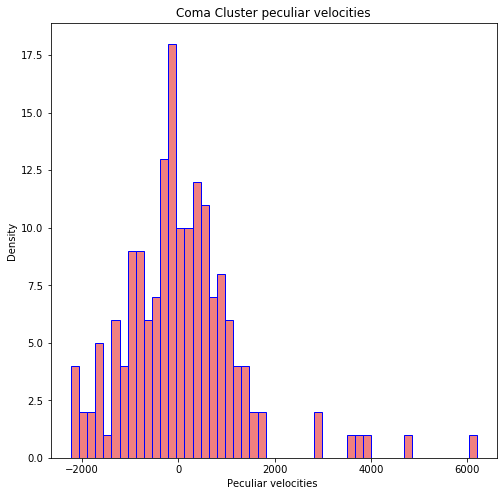

In [28]:
plt.figure(figsize=(8,8))

n=50
hist,vel_bin,_ = plt.hist(v_pec,bins=n,histtype='bar',ec='b', color='lightcoral')

plt.title('Coma Cluster peculiar velocities')
plt.xlabel('Peculiar velocities ')
plt.ylabel('Density')

bin_edges = hist
vel_bin = (bin_edges[:-1] + bin_edges[1:])/2

/opt/conda/lib/python3.7/site-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


mean= 60.3900981126623 km.s−1 uncertainty= 1216.9201781254728 km.s−1


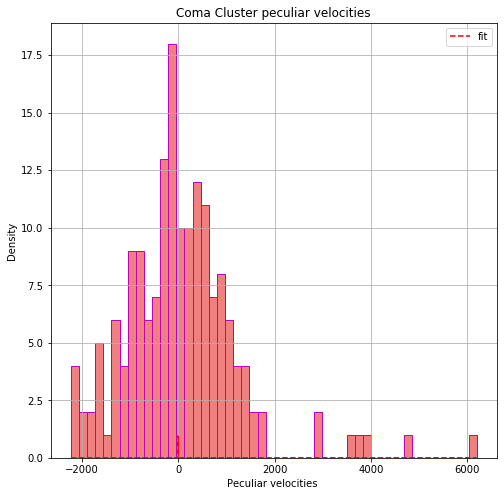

In [29]:
plt.figure(figsize=(8,8))

width = 0.001

n = math.ceil((v_pec.max() - v_pec.min())/width)
N = 50
ax1 = plt.hist(v_pec, bins = N, histtype='bar', ec='m', color='lightcoral')

plt.title('Coma Cluster peculiar velocities')
plt.xlabel('Peculiar velocities ')
plt.ylabel('Density')
plt.grid(1)
##########################################

mean = stat.mean(v_pec)
uncertainty = stat.stdev(v_pec)


a1 = 1 / (np.sqrt(2 * np.pi) * np.sqrt(uncertainty))

def Gauss1(v_pec, a1, mean, uncertainty):
    return a1*(np.exp(-((v_pec - mean)**2 / (2 * uncertainty))))

bin_heights, bin_borders, _ = ax1
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
popt, _ = curve_fit(Gauss1, bin_centers, bin_heights, p0=[1., 0., 1.])

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.plot(x_interval_for_fit, Gauss1(x_interval_for_fit, *popt),'r--',label='fit')

plt.legend()
##########################################
print('mean=',mean,'km.s−1','uncertainty=',uncertainty,'km.s−1')
plt.show()

In [36]:
# half radius 0.8894192885598508  Mpc --> 2.74446115904495372e+22
M_half = 3*((uncertainty*1000)**2)*(2.74446115904495372e+22)/6.674e-11
print('M_1/2 = ',M_half/2e30,'in M_sun, about = 9.4 x 10^14 M_sun')

L_half = 0.59153990503507*luminosity.sum()
LL = 1.03*luminosity.sum()
print(L_half)

M_1/2 =  913453260296608.4 in M_sun, about = 9.4 x 10^14 M_sun
892704810427.0555


In [39]:
(M_half/2e30)/LL

587.6588457544195